## Importing Libraries and Dataframe 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [3]:
# path variable 
path = r'C:\Users\jmiel\JENNY_STUFF\MY_DOCS\CareerFoundry\ClimateWins'

# Upload weather file
climate_cleaned = pd.read_csv(os.path.join(path, 'Data Sets', 'climate_cleaned.csv'))
climate_cleaned

,Unnamed: 0,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [4]:
climate_cleaned = climate_cleaned.drop('Unnamed: 0', axis =1)

In [5]:
climate_cleaned

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [6]:
pleasant_weather = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
climate =  pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'))

In [8]:
#Combine date and cleaned data
climate_date = pd.concat([climate['DATE'],climate_cleaned], axis=1)
climate_date

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,20221028,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,20221029,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,20221030,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [9]:
# Create a new variable to extract 1990-1999 temperatures
# Create a condition where the date column starts with 201. In order to do this, convert the date value to a string
decade_weather = climate_date[climate_date['DATE'].astype('str').str.startswith('199')]

In [10]:
decade_weather =  decade_weather.drop(columns=['DATE'])
decade_weather

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,0,0.83,1.0217,0.60,0.00,7.2,-2.1,-3.6,1.2,2,...,-0.3,3,0.82,1.0068,0.20,0.51,2.0,6.9,4.5,9.4
10959,2,0.84,1.0238,0.48,0.00,2.3,-1.8,-3.9,1.7,8,...,-3.4,5,0.79,1.0040,0.21,1.48,0.1,7.3,4.7,9.9
10960,8,0.89,1.0231,0.20,0.00,0.0,-2.2,-4.2,0.4,5,...,-2.6,4,0.90,1.0094,0.38,0.00,4.9,7.8,4.8,10.7
10961,2,0.77,1.0265,0.54,0.00,5.6,-0.7,-3.1,2.2,5,...,0.5,6,0.93,1.0112,0.13,0.92,0.0,6.5,2.0,11.0
10962,7,0.81,1.0286,0.23,0.04,0.2,0.0,-3.1,2.6,0,...,0.8,4,0.91,1.0108,0.20,0.56,1.2,9.4,7.2,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,7,0.74,0.9953,0.28,1.93,1.0,5.0,1.5,6.5,5,...,1.6,7,0.75,0.9954,0.15,0.41,0.1,4.8,3.0,7.5
14606,8,0.88,0.9956,0.13,1.22,0.0,2.4,1.0,3.4,8,...,1.0,3,0.73,1.0102,0.41,0.03,5.1,5.3,2.5,8.1
14607,8,0.84,1.0162,0.21,0.11,0.1,1.8,1.0,2.7,6,...,-1.1,5,0.81,1.0229,0.35,0.85,3.9,7.1,4.2,9.1
14608,7,0.80,1.0276,0.26,0.01,0.5,1.1,-0.3,3.4,3,...,-2.5,8,0.94,1.0171,0.14,0.27,0.0,8.4,5.5,11.2


## Random Forest 1990's

In [12]:
# Filter pleasant dataset to 1990s
pleasant_1990s = pleasant_weather[pleasant_weather['DATE'].astype(str).str.startswith('199')] 
pleasant_1990s.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
10958,19900101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10959,19900102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10960,19900103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10961,19900104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10962,19900105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Drop 'DATE' column from 1990s pleasant dataset
pleasant_1990s = pleasant_1990s.drop(columns=['DATE'])

# Check shape
pleasant_1990s.shape

(3652, 15)

In [14]:
X = decade_weather.to_numpy()
y = pleasant_1990s

In [15]:
y.shape

(3652, 15)

In [16]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y = y.max(axis=1)
print("Shape of y_combined:", y.shape)

Shape of y_combined: (3652,)


In [17]:
# Ensure y has the correct shape
y = y.to_numpy().reshape(-1)

In [18]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921,)
(731, 135) (731,)


## Hyperparameter Optimization Based on 1990's Weather Stations-Grid Search & Random Search

In [21]:
# Create a RF classifier

clf = RandomForestClassifier()

In [22]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[5,10,15,20],
              'min_samples_leaf':[3,5,10],
              'min_samples_split':[2,8,10]
           }

In [23]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 1.6313546140988668 minutes


In [24]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.9657663133207133


In [25]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [26]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [27]:
start_2 = time.time()
rf_random_2 = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_2 = rf_random_2.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start_2)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.0419252554575602 minutes


In [28]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random_2.best_params_))
print('Best RANDOM search score is: '+str(model_random_2.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 410}
Best RANDOM search score is: 0.9551515138725043


In [29]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=20, min_samples_leaf=5, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=20, min_samples_leaf=5, n_estimators=200)

In [30]:
# Perform the predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9658002735978112


[Text(0.4629237288135593, 0.9583333333333334, 'x[71] <= 12.75\ngini = 0.47\nsamples = 1859\nvalue = [1105, 1816]\nclass = pleasant'),
 Text(0.24152542372881355, 0.875, 'x[84] <= 1.685\ngini = 0.23\nsamples = 713\nvalue = [957, 146]\nclass = unpleasant'),
 Text(0.16101694915254236, 0.7916666666666666, 'x[26] <= 14.6\ngini = 0.105\nsamples = 584\nvalue = [852, 50]\nclass = unpleasant'),
 Text(0.1271186440677966, 0.7083333333333334, 'x[8] <= 17.6\ngini = 0.077\nsamples = 570\nvalue = [842, 35]\nclass = unpleasant'),
 Text(0.11016949152542373, 0.625, 'x[15] <= 14.8\ngini = 0.065\nsamples = 565\nvalue = [840, 29]\nclass = unpleasant'),
 Text(0.09322033898305085, 0.5416666666666666, 'x[88] <= 8.75\ngini = 0.054\nsamples = 560\nvalue = [836, 24]\nclass = unpleasant'),
 Text(0.03389830508474576, 0.4583333333333333, 'x[17] <= 17.55\ngini = 0.013\nsamples = 506\nvalue = [766, 5]\nclass = unpleasant'),
 Text(0.01694915254237288, 0.375, 'gini = 0.0\nsamples = 496\nvalue = [757, 0]\nclass = unpleas

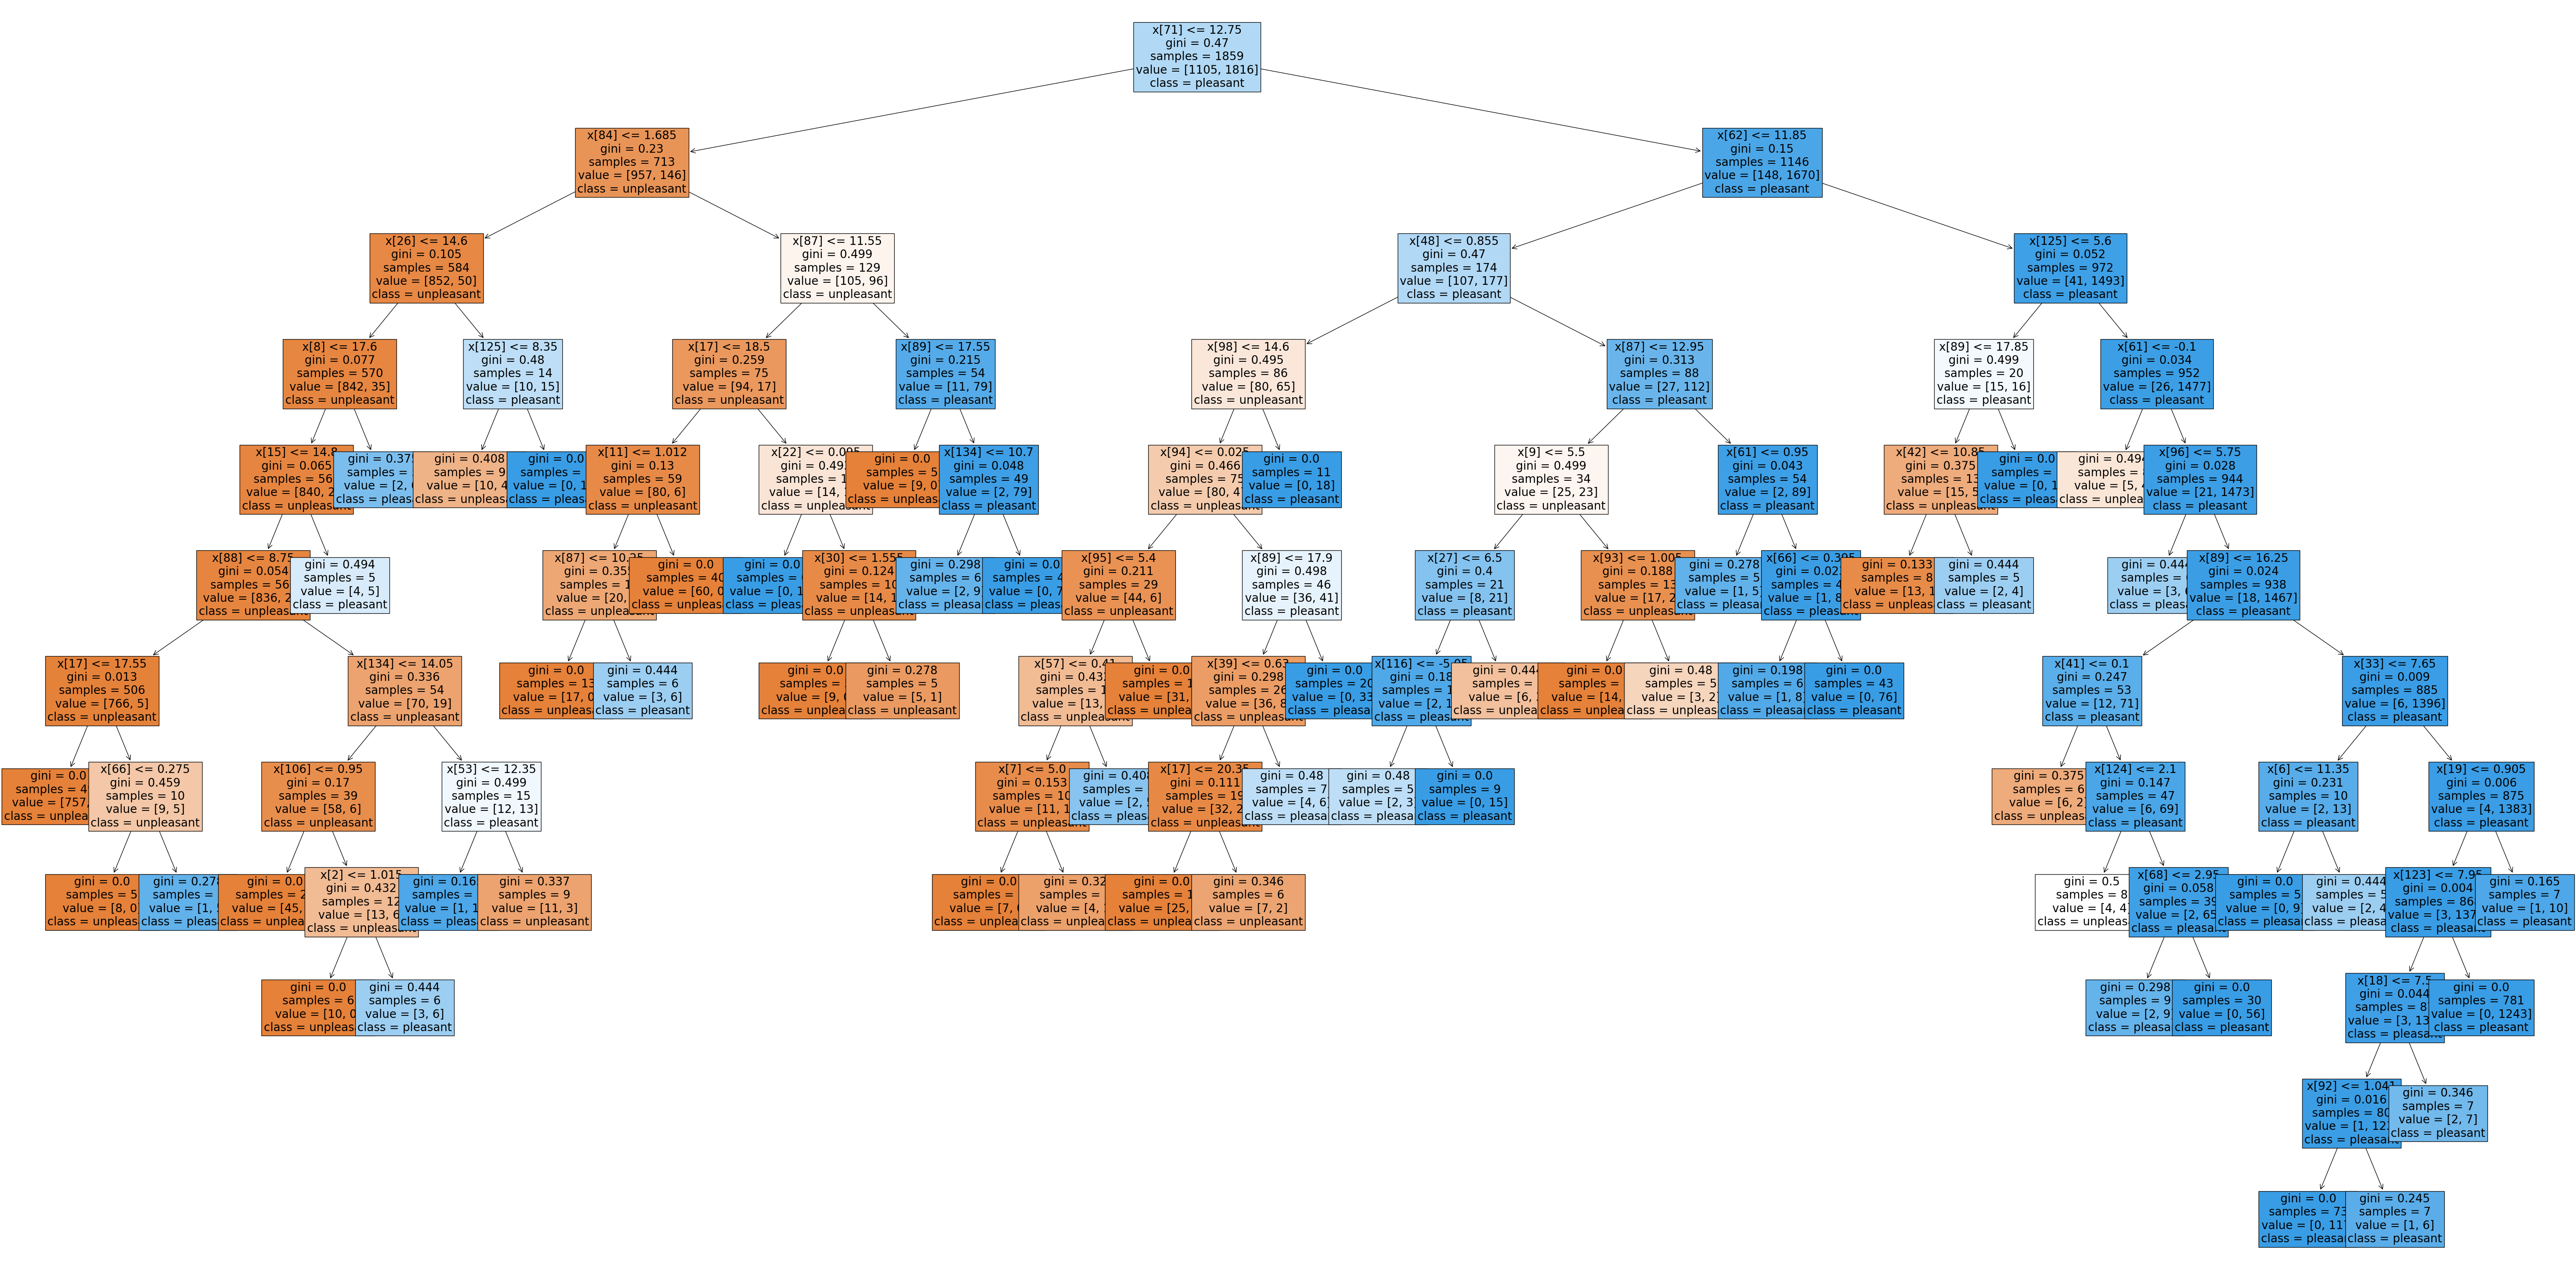

In [31]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=['unpleasant', 'pleasant'], filled=True)

## Feature Importance with Optimized 1990's 

In [33]:
# Retrieve feature importances from the trained model
feature_importances = clf3.feature_importances_
print("Feature Importances:", feature_importances)
print(feature_importances.shape)

Feature Importances: [1.83176788e-04 4.19815828e-04 4.93399346e-04 9.19021862e-04
 8.11318169e-04 6.28617232e-04 4.73231101e-02 8.67909470e-04
 1.01610592e-02 9.77654035e-04 3.05698298e-03 7.20888472e-04
 4.30575618e-03 4.27886199e-03 2.35775999e-03 4.01818631e-02
 2.93834914e-03 1.84477015e-02 2.62765947e-04 8.62765752e-04
 8.51148636e-04 1.51036647e-03 1.56668292e-03 1.43250905e-03
 4.27415378e-02 7.46479879e-03 7.99982641e-02 3.10593976e-04
 2.93837010e-04 4.23949116e-04 1.35206386e-03 2.78674838e-04
 8.77235069e-04 1.53826067e-03 5.63561315e-04 1.92450515e-02
 1.72265751e-04 3.11470868e-04 2.72401625e-04 1.15364968e-03
 2.73865807e-04 4.91338933e-04 6.44874393e-03 7.94333554e-04
 9.48315864e-03 1.38732405e-04 8.18333535e-04 5.89073482e-04
 3.41688666e-03 1.84703459e-04 5.53101556e-04 2.07020440e-03
 1.02474499e-03 7.04343609e-04 1.44883298e-04 5.13009103e-04
 2.92131535e-04 2.09369985e-03 4.38100038e-04 4.75519692e-04
 9.72544774e-03 8.74750406e-04 5.01254046e-02 1.17013060e-04
 9.

In [34]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances = feature_importances.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances.shape)

Reshaped Importances Shape: (1, 15, 9)


In [35]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances = np.sum(reshaped_importances[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances.shape)
print("Collapsed Importances:", collapsed_importances)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.06180743 0.07726582 0.13669084 0.02488323 0.01940123 0.00950012
 0.06468295 0.16528935 0.0189897  0.28561516 0.03843542 0.03565329
 0.00550039 0.04993711 0.00634796]


In [36]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [37]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_1990s = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances
})

In [38]:
# Sort by importance for chart readability
collapsed_importances_1990s = collapsed_importances_1990s.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_1990s)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.285615
7        LJUBLJANA    0.165289
2         BUDAPEST    0.136691
1         BELGRADE    0.077266
6           KASSEL    0.064683
0            BASEL    0.061807
13       STOCKHOLM    0.049937
10        MUNCHENB    0.038435
11            OSLO    0.035653
3           DEBILT    0.024883
4       DUSSELDORF    0.019401
8       MAASTRICHT    0.018990
5         HEATHROW    0.009500
14        VALENTIA    0.006348
12       SONNBLICK    0.005500


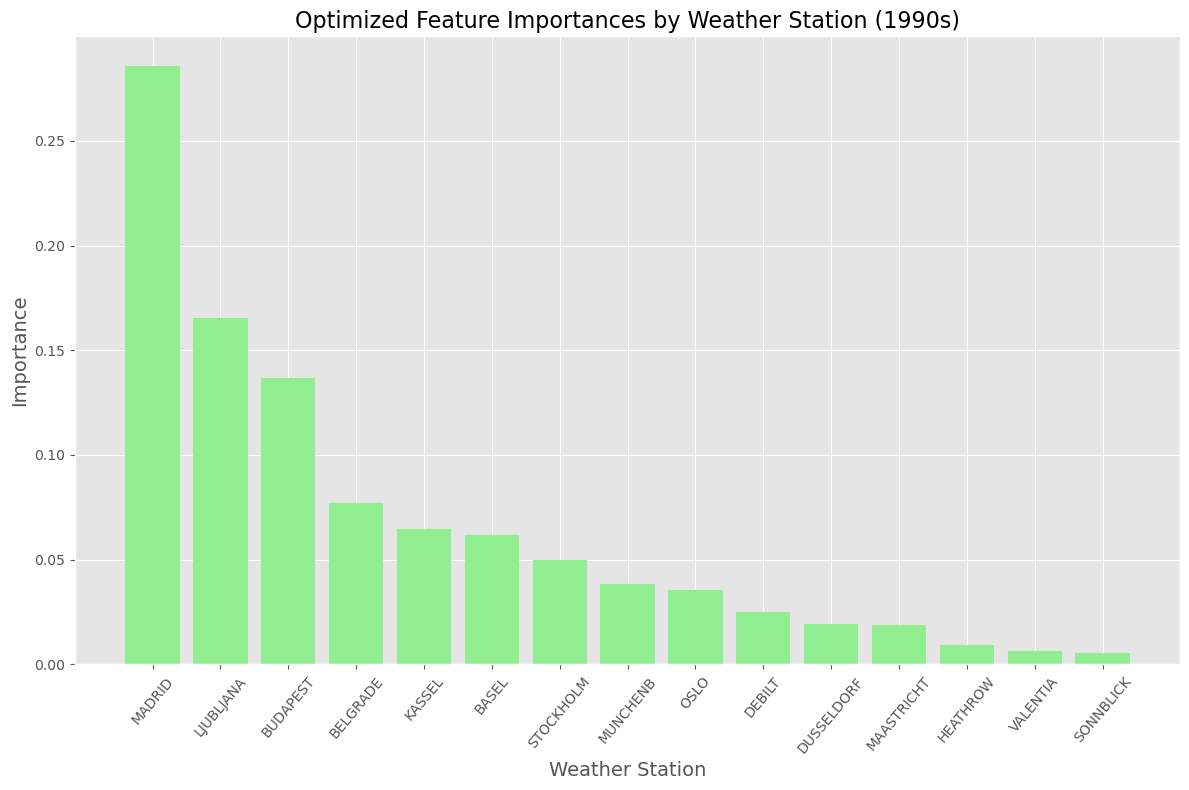

In [39]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_1990s['Weather Station'], collapsed_importances_1990s['Importance'], color='lightgreen')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Optimized Feature Importances by Weather Station (1990s)', fontsize=16)
plt.tight_layout()
plt.show()

## Random Forest Madrid

In [41]:
# Filter weather dataset to only include Madrid
df_madrid = climate_cleaned[climate_cleaned.columns[climate_cleaned.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_madrid.head()

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
0,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8
1,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2
2,5,0.90,1.0287,0.63,0.0,2.3,8.6,6.4,10.8
3,0,0.75,1.0281,1.16,0.0,8.7,10.3,4.5,16.1
4,2,0.64,1.0269,1.10,0.0,7.8,12.1,8.2,16.0


In [42]:
# Filter pleasant dataset to only include Madrid
pleasant_madrid = pleasant_weather[pleasant_weather.columns[pleasant_weather.columns.astype(str).str.startswith('MADRID')]]

# Check output
pleasant_madrid.head()

,MADRID_pleasant_weather
0,0
1,0
2,0
3,0
4,0


In [43]:
# Check shape
print(df_madrid.shape)
print(pleasant_madrid.shape)

(22950, 9)
(22950, 1)


In [44]:
# Create matrices
y_2 = pleasant_madrid.max(axis=1)

# Check shape
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (22950,)


In [45]:
# Create X matrix
X_2 = df_madrid.to_numpy()

# Check shapes of the matrices
print(X_2.shape)
print(y_2.shape)

(22950, 9)
(22950,)


In [46]:
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## Hyperparameter Optimization for Madrid-Grid Search & Random Search

In [48]:
# Create a RF classifier

clf4 = RandomForestClassifier()

In [49]:
start_4 = time.time()
grid_4 = GridSearchCV(clf4,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_4 = grid_4.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_4)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 1.865458877881368 minutes


In [50]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_4.best_params_))
print('Best GRID search score is: '+str(model_grid_4.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


In [51]:
# creating a RF classifier
clf5= RandomForestClassifier()

In [52]:
start_5 = time.time()
rf_random_5 = RandomizedSearchCV(clf5, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_5 = rf_random_5.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_5)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.9044077157974244 minutes


In [53]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random_5.best_params_))
print('Best RANDOM search score is: '+str(model_random_5.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 210}
Best RANDOM search score is: 1.0


In [54]:
# creating a RF classifier with the best results from above
clf6 = RandomForestClassifier(n_estimators = 10, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf6.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=3, max_features=10, min_samples_leaf=3,
                       n_estimators=10)

In [55]:
# Perform the predictions on the test dataset
y_pred_2 = clf6.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  1.0


[Text(0.4, 0.875, 'x[8] <= 17.95\ngini = 0.494\nsamples = 10901\nvalue = [9516, 7696]\nclass = unpleasant'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5166\nvalue = [8085, 0]\nclass = unpleasant'),
 Text(0.6, 0.625, 'x[4] <= 0.005\ngini = 0.264\nsamples = 5735\nvalue = [1431, 7696]\nclass = pleasant'),
 Text(0.4, 0.375, 'x[5] <= 0.95\ngini = 0.017\nsamples = 4890\nvalue = [68, 7696]\nclass = pleasant'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [68, 0]\nclass = unpleasant'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 4851\nvalue = [0, 7696]\nclass = pleasant'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 845\nvalue = [1363, 0]\nclass = unpleasant')]

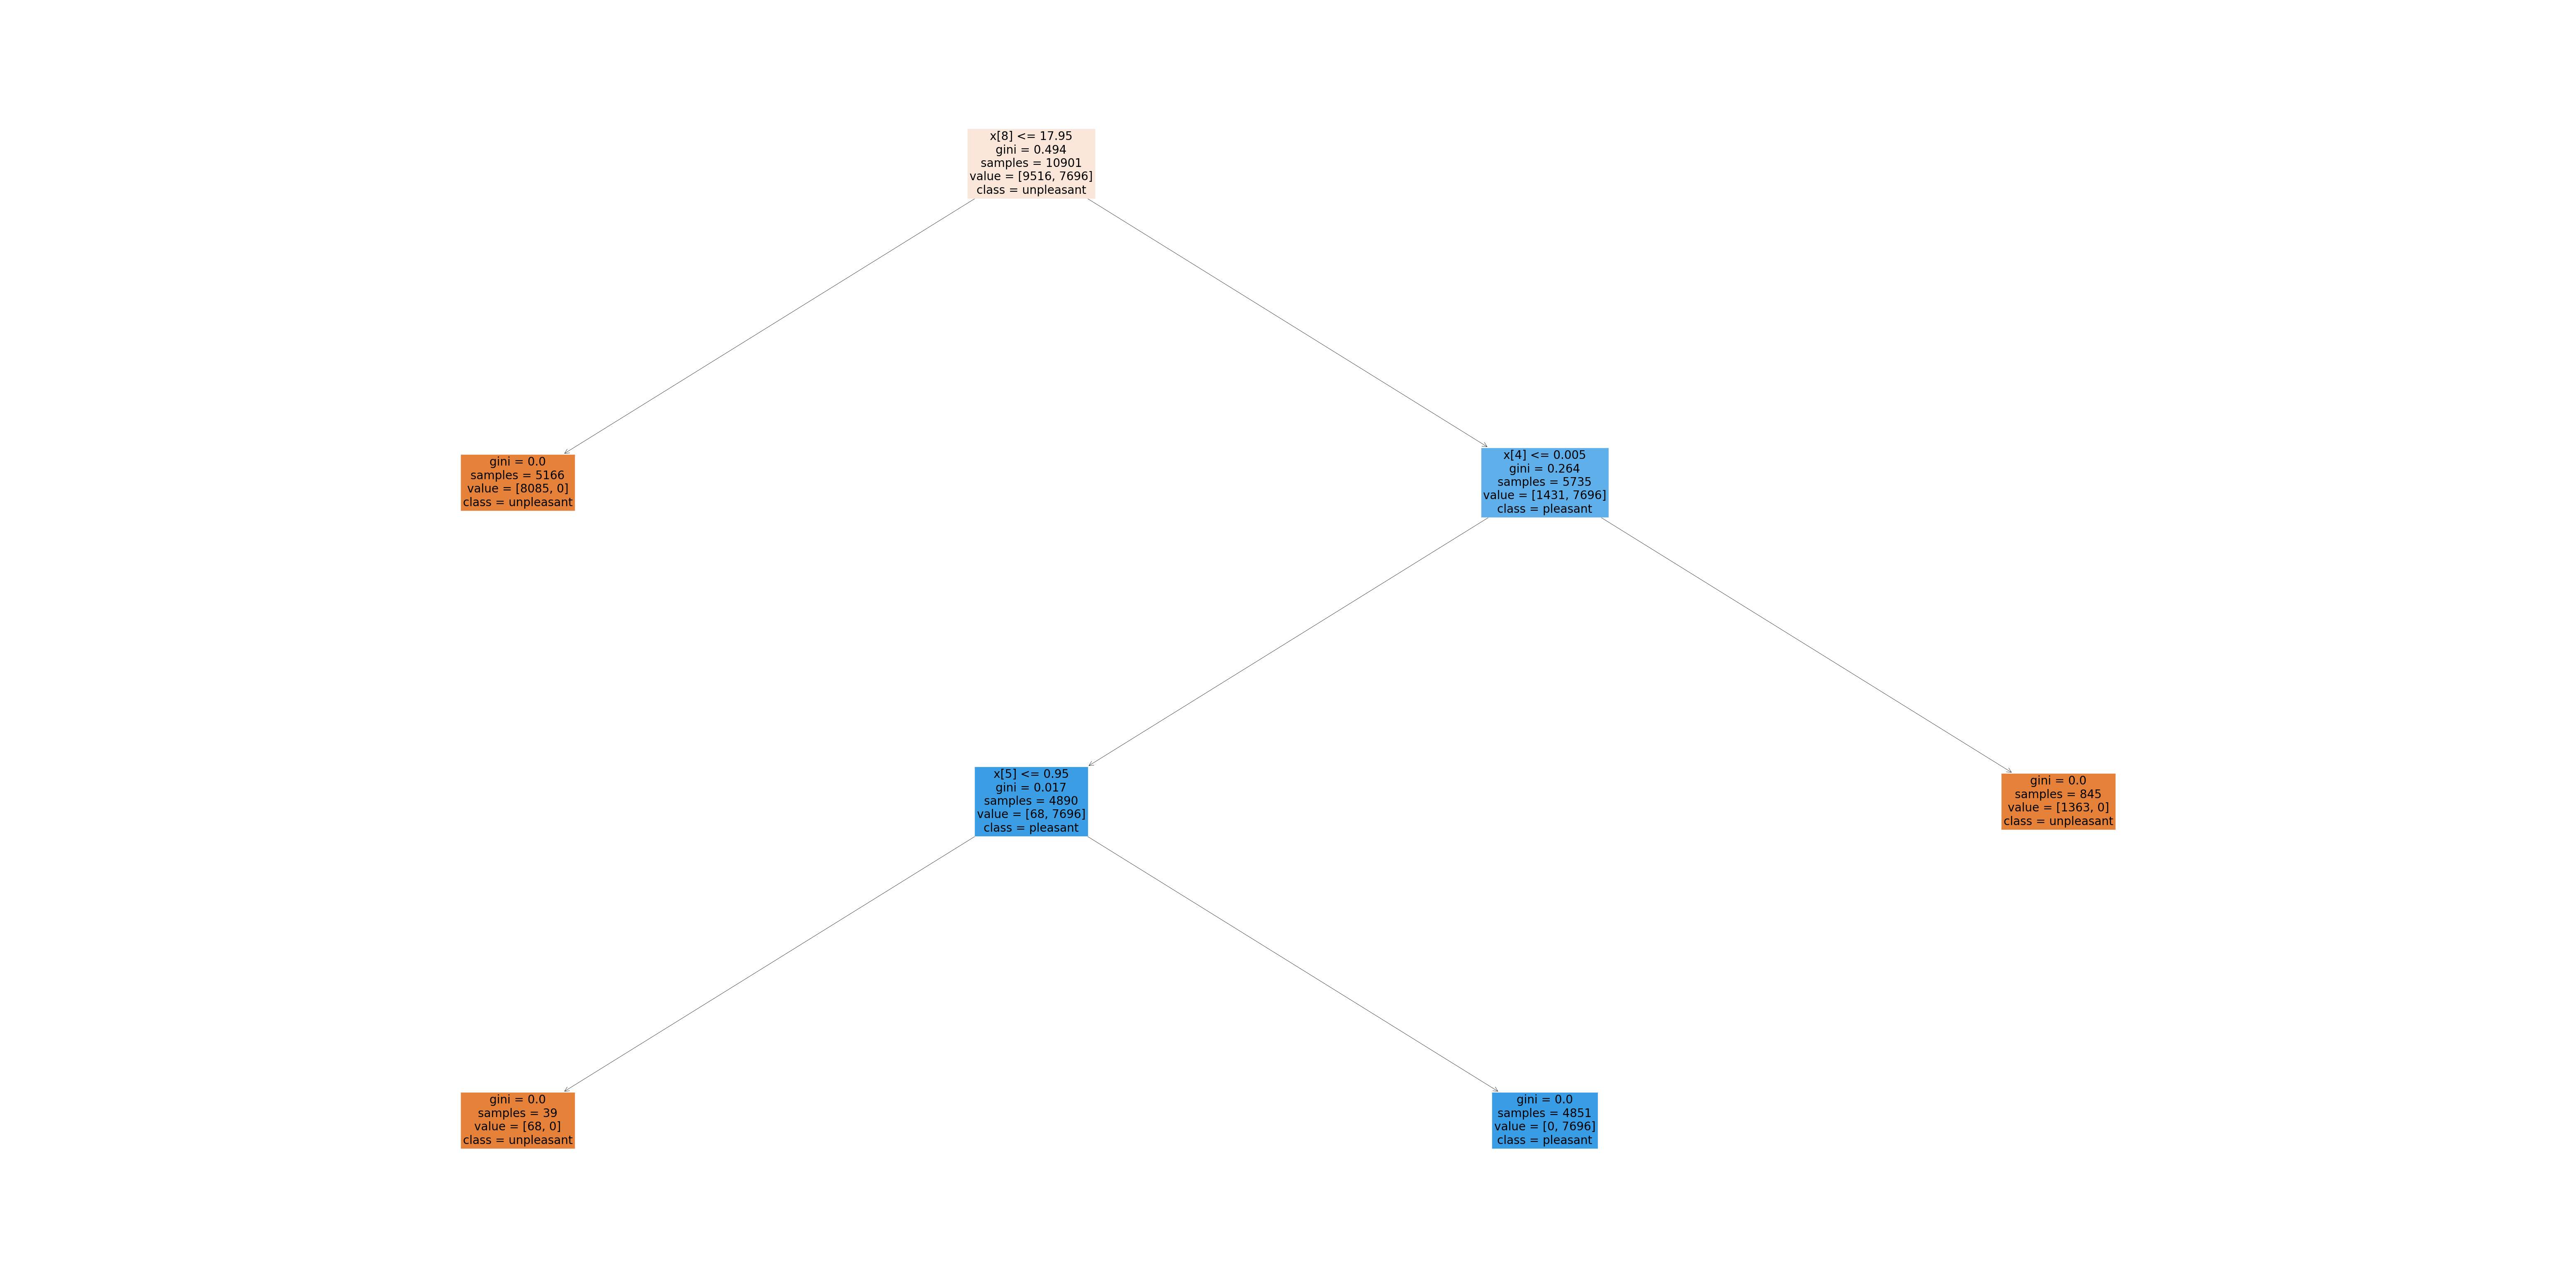

In [56]:
fig_2 = plt.figure(figsize=(80,40))
plot_tree(clf6.estimators_[8], fontsize = 20, class_names=['unpleasant', 'pleasant'], filled=True)

## Feature Importance with Optimization for Madrid

In [58]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf6.feature_importances_
print("Feature Importances:", feature_importances_2)
print(feature_importances_2.shape)

Feature Importances: [0.         0.         0.         0.         0.26973803 0.01463407
 0.         0.         0.7156279 ]
(9,)


In [59]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [60]:
# Create a dataframe to associate observation measurements with their importances
importances_df_2 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_2
})

In [61]:
# Sort by importance for chart readability
importances_df_2 = importances_df_2.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_2)

Feature Importance:
        Measurement  Importance
8          temp_max    0.715628
4     precipitation    0.269738
5          sunshine    0.014634
0       cloud_cover    0.000000
1          humidity    0.000000
2          pressure    0.000000
3  global_radiation    0.000000
6         temp_mean    0.000000
7          temp_min    0.000000


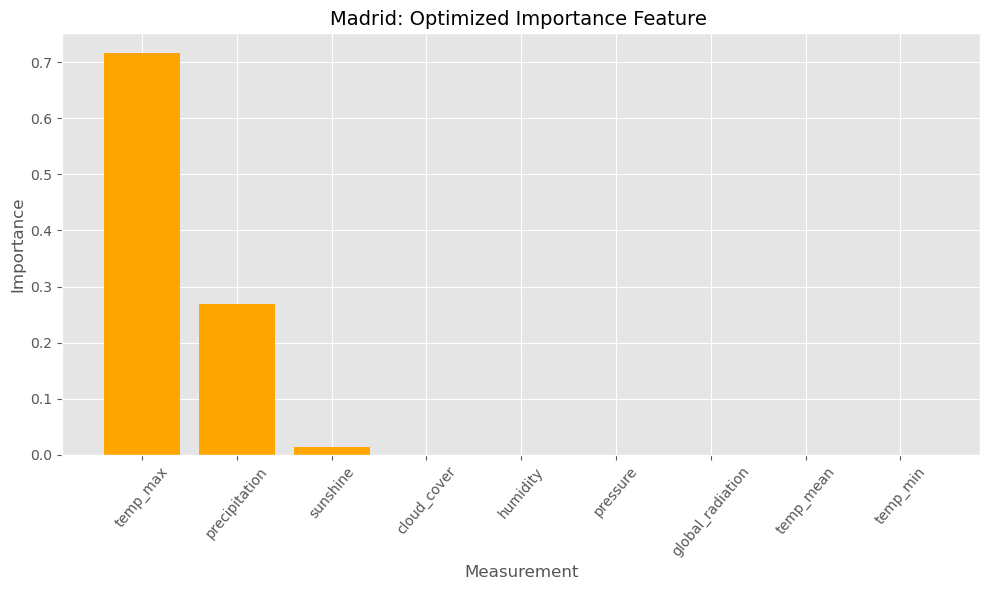

In [62]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_2['Measurement'], importances_df_2['Importance'], color='orange')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Optimized Importance Feature ", fontsize=14)
plt.tight_layout()
plt.show()